In [175]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import seaborn as sns

In [7]:
engine = create_engine("sqlite:///data/mta_turnstile.db")

In [8]:
all_tables = engine.table_names()
all_tables
some_tables = all_tables[4:26]
len(some_tables)

22

In [9]:
dfs = []
for table in some_tables:
    dfs.append(pd.read_sql(table,engine))
    mtadf = pd.concat(dfs)
mtadf.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/26/2019,03:00:00,REGULAR,6922652,2347673
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/26/2019,07:00:00,REGULAR,6922669,2347688
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/26/2019,11:00:00,REGULAR,6922747,2347773
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/26/2019,15:00:00,RECOVR AUD,6922932,2347849
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/26/2019,19:00:00,REGULAR,6923237,2347911


In [27]:
mtadf = mtadf[(mtadf['LINENAME'].str.contains('7'))]

In [45]:
mtadf7 = mtadf.copy()

In [46]:
mtadf7['DATE'] = mtadf7['DATE'].apply(pd.to_datetime)

In [108]:
jan31 = mtadf7[(mtadf7.DATE.dt.month == 1) & (mtadf7.DATE.dt.day.isin([31]))]
jan31
mtadf_nojan = mtadf7[(mtadf7.DATE.dt.month != 1)]
mtadf7_nojan
mtadf7_27 = pd.concat([jan31,mtadf7_nojan])
mtadf7_27.reset_index(inplace=True,drop=True)

In [109]:
july1 = mtadf7_27[(mtadf7_27.DATE.dt.month == 7) & (mtadf7_27.DATE.dt.day.isin([1]))]
july1
mtadf7_nojuly = mtadf7_27[(mtadf7_27.DATE.dt.month != 7)]
mtadf7_nojuly
mtadf7_26 = pd.concat([mtadf7_nojuly,july1])
mtadf7_26

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2019-01-31,03:00:00,REGULAR,8520993,10408171
1,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2019-01-31,07:00:00,REGULAR,8521128,10408280
2,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2019-01-31,11:00:00,REGULAR,8521601,10410411
3,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2019-01-31,15:00:00,REGULAR,8522140,10411125
4,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2019-01-31,19:00:00,REGULAR,8523496,10412229
...,...,...,...,...,...,...,...,...,...,...,...
412844,R551,R072,01-05-01,34 ST-HUDSON YD,7,IRT,2019-07-01,04:00:00,REGULAR,1,26
412845,R551,R072,01-05-01,34 ST-HUDSON YD,7,IRT,2019-07-01,08:00:00,REGULAR,1,26
412846,R551,R072,01-05-01,34 ST-HUDSON YD,7,IRT,2019-07-01,12:00:00,REGULAR,1,26
412847,R551,R072,01-05-01,34 ST-HUDSON YD,7,IRT,2019-07-01,16:00:00,REGULAR,1,26


In [110]:
mtadf = mtadf7_26.copy()

In [111]:
mtadf

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2019-01-31,03:00:00,REGULAR,8520993,10408171
1,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2019-01-31,07:00:00,REGULAR,8521128,10408280
2,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2019-01-31,11:00:00,REGULAR,8521601,10410411
3,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2019-01-31,15:00:00,REGULAR,8522140,10411125
4,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2019-01-31,19:00:00,REGULAR,8523496,10412229
...,...,...,...,...,...,...,...,...,...,...,...
412844,R551,R072,01-05-01,34 ST-HUDSON YD,7,IRT,2019-07-01,04:00:00,REGULAR,1,26
412845,R551,R072,01-05-01,34 ST-HUDSON YD,7,IRT,2019-07-01,08:00:00,REGULAR,1,26
412846,R551,R072,01-05-01,34 ST-HUDSON YD,7,IRT,2019-07-01,12:00:00,REGULAR,1,26
412847,R551,R072,01-05-01,34 ST-HUDSON YD,7,IRT,2019-07-01,16:00:00,REGULAR,1,26


In [112]:
print('DTYPES:\n',mtadf.dtypes,'\n')
print('COLUMNS:\n',mtadf.columns,'\n')
print('NUMBER ROWS:\n', mtadf.shape[0],'\n')
print('ROWS PER STATION:\n', mtadf.STATION.value_counts())

DTYPES:
 C/A                                                                             object
UNIT                                                                            object
SCP                                                                             object
STATION                                                                         object
LINENAME                                                                        object
DIVISION                                                                        object
DATE                                                                    datetime64[ns]
TIME                                                                            object
DESC                                                                            object
ENTRIES                                                                          int64
EXITS                                                                            int64
dtype: object 

COLUMNS:
 Index(['

In [113]:
# fix the insane amount of space after 'EXITS'
mtadf.rename(str.strip, axis='columns',inplace=True)
mtadf.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [114]:
# change DATE back to string
mtadf['DATE'] = mtadf['DATE'].dt.strftime('%m/%d/%Y')

In [115]:
mtadf['OBSERVED_AT'] = pd.to_datetime(mtadf['DATE']+ ' ' + mtadf['TIME'], 
                                      format='%m/%d/%Y %H:%M:%S')

In [202]:
# 21 days of data AKA 3 weeks
# mtadf.DATE.value_counts().sort_index()

In [203]:
# SAVE FOR LATER
# create column for day of week
# mtadf['WEEKDAY']=mtadf['OBSERVED_AT'].dt.dayofweek
# change WEEKDAY from int64 to string Monday-Sunday
'''daymap = {0:'Monday',
          1: 'Tuesday',
          2: 'Wednesday',
          3: 'Thursday',
          4: 'Friday',
          5: 'Saturday',
          6: 'Sunday'}
mtadf['WEEKDAY']=mtadf['WEEKDAY'].map(daymap)
'''

"daymap = {0:'Monday',\n          1: 'Tuesday',\n          2: 'Wednesday',\n          3: 'Thursday',\n          4: 'Friday',\n          5: 'Saturday',\n          6: 'Sunday'}\nmtadf['WEEKDAY']=mtadf['WEEKDAY'].map(daymap)\n"

In [116]:
# create some other columns based on the datetime object
mtadf['MONTH'] = mtadf.OBSERVED_AT.dt.month
mtadf['DAY'] = mtadf.OBSERVED_AT.dt.day

# don't end up using
# mtadf['HOUR'] = mtadf.OBSERVED_AT.dt.hour
# mtadf['MIN'] = mtadf.OBSERVED_AT.dt.minute

In [120]:
# create identifyer for each turnstile then drop original columns
mtadf['TURNSTILE'] = mtadf['UNIT'] + '-' + mtadf['C/A'] + '-' + mtadf['SCP']

# didn't end up needing this
# mtadf['TURNSTILE_ID'] = mtadf['UNIT'] + '-' + mtadf['C/A'] + '-' + mtadf['SCP']\
                       # + '-' + mtadf['DATE'] + '-' + mtadf['TIME']

In [121]:
mtadf.drop(['C/A','UNIT','SCP','DIVISION'],axis=1,inplace=True)

In [122]:
mtadf.columns

Index(['STATION', 'LINENAME', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS',
       'OBSERVED_AT', 'MONTH', 'DAY', 'TURNSTILE'],
      dtype='object')

In [124]:
# rearrange order of columns
col_names = ['STATION','TURNSTILE','OBSERVED_AT',
             'DATE','MONTH','DAY','TIME',
             'ENTRIES','EXITS',
             'LINENAME','DESC']
mtadf = mtadf.reindex(columns=col_names)
mtadf.head(1)

,STATION,TURNSTILE,OBSERVED_AT,DATE,MONTH,DAY,TIME,ENTRIES,EXITS,LINENAME,DESC
0,TIMES SQ-42 ST,R032-A021-01-00-00,2019-01-31 03:00:00,01/31/2019,1,31,03:00:00,8520993,10408171,ACENQRS1237W,REGULAR


# NEW DATAFRAME: mtadfs
### SORTED BY STATION, MONTH, DAY

In [125]:
# sort the dataframe by station, then month/day/hour/min
mtadfs = mtadf.sort_values(['STATION','MONTH','DAY'])

In [126]:
mtadfs.OBSERVED_AT.dt.hour.value_counts()
#some observations are at HOUR 0 aka midnight

8     43306
16    41165
12    40815
4     40748
20    40615
0     40436
9     13653
17    12804
13    12784
21    12561
5     12503
1     12352
7     11122
11    10816
15    10398
23    10320
19    10316
3     10269
10     2796
22     2468
18     2354
6      2198
14     2191
2      2139
Name: OBSERVED_AT, dtype: int64

In [127]:
# create an hour offset
one_hour = pd.offsets.Hour()

In [128]:
# how many rows occur from midnight to midnight:59?
print('midnight hour:', mtadfs[mtadfs.OBSERVED_AT.dt.hour == 0].shape[0])
print('all rows:', mtadfs.shape[0])

midnight hour: 40436
all rows: 401129


In [129]:
# if the observation was from midnight to midight:59
# subtract 1 hour so the log is included for the previous day
mtadfs['OBSERVED_AT'] = mtadfs['OBSERVED_AT'].apply(lambda x: x-one_hour if x.hour == 0 else x)

In [130]:
# update hour
# check if we have any instances of midnight to midnight:59
mtadfs['HOUR'] = mtadfs['OBSERVED_AT'].dt.hour
print(mtadfs[mtadfs['HOUR'] == 0])

Empty DataFrame
Columns: [STATION, TURNSTILE, OBSERVED_AT, DATE, MONTH, DAY, TIME, ENTRIES, EXITS, LINENAME, DESC, HOUR]
Index: []


# NEW DATAFRAME: mtadf_ts_daily
### CUMULATIVE DAILY VALUES PER TURNSTILE 
### (INCL LINENAME)

In [131]:
# get daily cumulative # per turnstile per day
# group by turnstile -- max value of that turnstile is the max value for that day
mtadf_ts_daily = mtadfs.groupby(['TURNSTILE','STATION','DATE','LINENAME'],as_index=False)\
                        [['ENTRIES','EXITS']].max()
mtadf_ts_daily

,TURNSTILE,STATION,DATE,LINENAME,ENTRIES,EXITS
0,R010-N060-01-00-00,42 ST-PORT AUTH,01/31/2019,ACENGRS1237W,10811828,16658639
1,R010-N060-01-00-00,42 ST-PORT AUTH,02/01/2019,ACENGRS1237W,10813640,16662828
2,R010-N060-01-00-00,42 ST-PORT AUTH,02/02/2019,ACENGRS1237W,10815201,16666439
3,R010-N060-01-00-00,42 ST-PORT AUTH,02/03/2019,ACENGRS1237W,10816713,16669017
4,R010-N060-01-00-00,42 ST-PORT AUTH,02/04/2019,ACENGRS1237W,10818236,16672272
...,...,...,...,...,...,...
65563,R347-R524-00-05-01,69 ST,06/27/2019,7,883345,481980
65564,R347-R524-00-05-01,69 ST,06/28/2019,7,884257,482434
65565,R347-R524-00-05-01,69 ST,06/29/2019,7,885136,482773
65566,R347-R524-00-05-01,69 ST,06/30/2019,7,885843,483073


In [132]:
mtadf_ts_daily[['PREV_DATE','PREV_ENTRIES','PREV_EXITS']]=mtadf_ts_daily\
                            .groupby(['TURNSTILE','STATION'])[['DATE', 'ENTRIES','EXITS']]\
                            .apply(lambda grp: grp.shift(1))
mtadf_ts_daily            

,TURNSTILE,STATION,DATE,LINENAME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,R010-N060-01-00-00,42 ST-PORT AUTH,01/31/2019,ACENGRS1237W,10811828,16658639,NaN,NaN,NaN
1,R010-N060-01-00-00,42 ST-PORT AUTH,02/01/2019,ACENGRS1237W,10813640,16662828,01/31/2019,10811828.0,16658639.0
2,R010-N060-01-00-00,42 ST-PORT AUTH,02/02/2019,ACENGRS1237W,10815201,16666439,02/01/2019,10813640.0,16662828.0
3,R010-N060-01-00-00,42 ST-PORT AUTH,02/03/2019,ACENGRS1237W,10816713,16669017,02/02/2019,10815201.0,16666439.0
4,R010-N060-01-00-00,42 ST-PORT AUTH,02/04/2019,ACENGRS1237W,10818236,16672272,02/03/2019,10816713.0,16669017.0
...,...,...,...,...,...,...,...,...,...
65563,R347-R524-00-05-01,69 ST,06/27/2019,7,883345,481980,06/26/2019,882415.0,481516.0
65564,R347-R524-00-05-01,69 ST,06/28/2019,7,884257,482434,06/27/2019,883345.0,481980.0
65565,R347-R524-00-05-01,69 ST,06/29/2019,7,885136,482773,06/28/2019,884257.0,482434.0
65566,R347-R524-00-05-01,69 ST,06/30/2019,7,885843,483073,06/29/2019,885136.0,482773.0


In [133]:
# drop the rows for the earliest date in the DF for each Turnstile
mtadf_ts_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [134]:
mtadf_ts_daily.shape[0]

65113

In [135]:
# how many entries are going backwards
mtadf_ts_daily[mtadf_ts_daily['ENTRIES'] < mtadf_ts_daily['PREV_ENTRIES']].shape[0]

862

In [141]:
# how many turnstiles per station
mtadf.groupby('STATION')['TURNSTILE'].nunique().sort_values()

STATION
74 ST-BROADWAY      5
111 ST              5
QUEENSBORO PLZ      6
40 ST LOWERY ST     6
52 ST               6
COURT SQ            8
69 ST               8
90 ST-ELMHURST      9
103 ST-CORONA       9
82 ST-JACKSON H    10
HUNTERS PT AV      10
33 ST-RAWSON ST    10
5 AVE              10
46 ST BLISS ST     12
61 ST WOODSIDE     12
JUNCTION BLVD      12
VERNON-JACKSON     13
42 ST-BRYANT PK    21
JKSN HT-ROOSVLT    22
FLUSHING-MAIN      27
34 ST-HUDSON YD    30
METS-WILLETS PT    36
TIMES SQ-42 ST     50
42 ST-PORT AUTH    51
GRD CNTRL-42 ST    67
Name: TURNSTILE, dtype: int64

In [221]:
# would be ideal if broken turnstiles just get .mean() for all the other turnstiles at that station

In [142]:
def get_daily_entries(df):
    #max_count is 30 persons per minute through the turnstile
    max_count = (30*60) * 24
    count = df['ENTRIES'] - df['PREV_ENTRIES']
    if count < 0:
        count = -count
        
    if count > max_count:
        count = min(df["ENTRIES"], df["PREV_ENTRIES"])
    
    if count > max_count:
        return 0
    return count

In [143]:
mtadf_ts_daily['NET_ENTRIES']= mtadf_ts_daily.apply(get_daily_entries, axis=1)

In [144]:
def get_daily_exits(df):
    max_count = (30*60) * 24
    count = df['EXITS'] - df['PREV_EXITS']
    if count < 0:
        count = -count
        
    if count > max_count:
        count = min(df['EXITS'], df['PREV_EXITS'])
    
    if count > max_count:
        return 0
    return count

In [145]:
mtadf_ts_daily['NET_EXITS']= mtadf_ts_daily.apply(get_daily_exits, axis=1)

# NEW DATAFRAME: mtadf_st_daily
### CUMULATIVE DAILY VALUES PER STATION
### (INCL LINENAME)

In [352]:
# create a DF with daily # per STATION per DATE, sum the NET_ENTRIES NET_EXITS per STATION
mtadf_st_daily = mtadf_ts_daily.groupby(['STATION','DATE','LINENAME'],as_index=False)[['NET_ENTRIES','NET_EXITS']].sum()

In [353]:
# create a column for NET_BUSY
mtadf_st_daily['NET_BUSY'] = mtadf_st_daily['NET_ENTRIES'] + mtadf_st_daily['NET_EXITS']

In [354]:
# we *should* have a dataframe that shows net entries, net exits, and net busy by station by day!
mtadf_st_daily

,STATION,DATE,LINENAME,NET_ENTRIES,NET_EXITS,NET_BUSY
0,103 ST-CORONA,02/01/2019,7,19339.0,14082.0,33421.0
1,103 ST-CORONA,02/02/2019,7,13791.0,10879.0,24670.0
2,103 ST-CORONA,02/03/2019,7,9960.0,8712.0,18672.0
3,103 ST-CORONA,02/04/2019,7,19765.0,14083.0,33848.0
4,103 ST-CORONA,02/05/2019,7,19235.0,13704.0,32939.0
...,...,...,...,...,...,...
4017,VERNON-JACKSON,06/27/2019,7,14328.0,11409.0,25737.0
4018,VERNON-JACKSON,06/28/2019,7,13772.0,11111.0,24883.0
4019,VERNON-JACKSON,06/29/2019,7,8467.0,7924.0,16391.0
4020,VERNON-JACKSON,06/30/2019,7,14849.0,8794.0,23643.0


In [355]:
# put DATE back as a datetime object
mtadf_st_daily['DATE'] = pd.to_datetime(mtadf_st_daily['DATE'])

In [151]:
mtadf_st_daily['WEEKDAY']=mtadf_st_daily['DATE'].dt.dayofweek
# change WEEKDAY from int64 to string Monday-Sunday
daymap = {0:'Monday',
          1: 'Tuesday',
          2: 'Wednesday',
          3: 'Thursday',
          4: 'Friday',
          5: 'Saturday',
          6: 'Sunday'}
mtadf_st_daily['WEEKDAY']=mtadf_st_daily['WEEKDAY'].map(daymap)

In [356]:
mtadf_st_daily

,STATION,DATE,LINENAME,NET_ENTRIES,NET_EXITS,NET_BUSY
0,103 ST-CORONA,2019-02-01,7,19339.0,14082.0,33421.0
1,103 ST-CORONA,2019-02-02,7,13791.0,10879.0,24670.0
2,103 ST-CORONA,2019-02-03,7,9960.0,8712.0,18672.0
3,103 ST-CORONA,2019-02-04,7,19765.0,14083.0,33848.0
4,103 ST-CORONA,2019-02-05,7,19235.0,13704.0,32939.0
...,...,...,...,...,...,...
4017,VERNON-JACKSON,2019-06-27,7,14328.0,11409.0,25737.0
4018,VERNON-JACKSON,2019-06-28,7,13772.0,11111.0,24883.0
4019,VERNON-JACKSON,2019-06-29,7,8467.0,7924.0,16391.0
4020,VERNON-JACKSON,2019-06-30,7,14849.0,8794.0,23643.0


In [232]:
# mtadf_st_daily['LINE'] = mtadf_st_daily['LINENAME'].str.replace('',',')

In [233]:
#mtadf_st_daily.sample(frac=.1)

,STATION,DATE,LINENAME,NET_ENTRIES,NET_EXITS,NET_BUSY,WEEKDAY,LINE
66590,VAN SICLEN AV,2019-06-24,3,2883.0,2953.0,5836.0,Monday,",3,"
18797,63 DR-REGO PARK,2019-05-30,MR,16021.0,5832.0,21853.0,Thursday,",M,R,"
19268,67 AV,2019-07-02,MR,8682.0,4329.0,13011.0,Tuesday,",M,R,"
43581,FT HAMILTON PKY,2019-02-24,D,1870.0,1363.0,3233.0,Sunday,",D,"
1771,116 ST,2019-05-16,23,11902.0,5722.0,17624.0,Thursday,",2,3,"
...,...,...,...,...,...,...,...,...
40163,E 149 ST,2019-07-03,6,4373.0,4236.0,8609.0,Wednesday,",6,"
40985,ELDER AV,2019-05-16,6,6778.0,6392.0,13170.0,Thursday,",6,"
34745,CASTLE HILL AV,2019-06-09,6,3066.0,4094.0,7160.0,Sunday,",6,"
47988,INTERVALE AV,2019-05-14,25,3253.0,3449.0,6702.0,Tuesday,",2,5,"


In [234]:
#mtadf_st_daily['LINE']=mtadf_st_daily['LINE'].str.strip(',')
#mtadf_st_daily.sample(frac=.1)

,STATION,DATE,LINENAME,NET_ENTRIES,NET_EXITS,NET_BUSY,WEEKDAY,LINE
31272,BOROUGH HALL,2019-04-24,2345R,33726.0,22578.0,56304.0,Wednesday,"2,3,4,5,R"
45496,GRD CNTRL-42 ST,2019-05-03,4567S,157921.0,141990.0,299911.0,Friday,"4,5,6,7,S"
49352,JFK JAMAICA CT1,2019-07-03,E,20872.0,4517.0,25389.0,Wednesday,E
25451,ASTORIA DITMARS,2019-02-19,NQW,13469.0,10243.0,23712.0,Tuesday,"N,Q,W"
16042,5 AV/53 ST,2019-06-10,EM,29979.0,31636.0,61615.0,Monday,"E,M"
...,...,...,...,...,...,...,...,...
17438,57 ST,2019-04-12,F,12828.0,13308.0,26136.0,Friday,F
9963,219 ST,2019-02-28,25,3449.0,1772.0,5221.0,Thursday,"2,5"
45883,GUN HILL RD,2019-02-18,5,2842.0,801.0,3643.0,Monday,5
2454,125 ST,2019-04-10,ACBD,29894.0,25356.0,55250.0,Wednesday,"A,C,B,D"


In [235]:
#dummy = mtadf_st_daily.LINE.str.get_dummies(sep = ",")
#dummy.columns

Index(['1', '2', '3', '4', '5', '6', '7', 'A', 'B', 'C', 'D', 'E', 'F', 'G',
       'J', 'L', 'M', 'N', 'Q', 'R', 'S', 'W', 'Z'],
      dtype='object')

# NEW DATAFRAME: stdf_daily_lines
### NET DAILY VALUES
### LINE DUMMIES

In [236]:
#stdf_daily_lines = mtadf_st_daily.merge(dummy, left_index=True, right_index=True)
#stdf_daily_lines.sample(frac=.1)

,STATION,DATE,LINENAME,NET_ENTRIES,NET_EXITS,NET_BUSY,WEEKDAY,LINE,1,2,...,G,J,L,M,N,Q,R,S,W,Z
68479,WINTHROP ST,2019-06-04,25,6357.0,1415.0,7772.0,Tuesday,"2,5",0,1,...,0,0,0,0,0,0,0,0,0,0
27302,AVENUE U,2019-06-25,N,3200.0,2553.0,5753.0,Tuesday,N,0,0,...,0,0,0,0,1,0,0,0,0,0
24646,9TH STREET,2019-06-14,1,4742.0,5400.0,10142.0,Friday,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9109,20 AV,2019-02-25,N,3723.0,720.0,4443.0,Monday,N,0,0,...,0,0,0,0,1,0,0,0,0,0
41807,FLUSHING AV,2019-02-23,JM,7592.0,3637.0,11229.0,Saturday,"J,M",0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61163,RECTOR ST,2019-06-09,NRW,2223.0,866.0,3089.0,Sunday,"N,R,W",0,0,...,0,0,0,0,1,0,1,0,1,0
41465,EXCHANGE PLACE,2019-06-27,1,17731.0,19191.0,36922.0,Thursday,1,1,0,...,0,0,0,0,0,0,0,0,0,0
10102,225 ST,2019-02-21,25,3725.0,1813.0,5538.0,Thursday,"2,5",0,1,...,0,0,0,0,0,0,0,0,0,0
31826,BOWLING GREEN,2019-06-09,45,9823.0,10532.0,20355.0,Sunday,"4,5",0,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
#stdf_daily_lines.drop(['LINENAME','LINE'],axis=1,inplace=True)

In [238]:
#stdf_daily_lines.groupby('STATION')

In [239]:
#for i in '1234567ABCDEFGJLMNQRSWZ':
    #grouped = stdf_daily_lines.groupby(i)
    #count = grouped.apply(lambda x: x[x[i] == 1])['STATION'].nunique()
    #print(f'LINE: {i} \nSTATIONS: {count} ')

LINE: 1 
STATIONS: 61 
LINE: 2 
STATIONS: 53 
LINE: 3 
STATIONS: 38 
LINE: 4 
STATIONS: 30 
LINE: 5 
STATIONS: 45 
LINE: 6 
STATIONS: 42 
LINE: 7 
STATIONS: 25 
LINE: A 
STATIONS: 49 
LINE: B 
STATIONS: 45 
LINE: C 
STATIONS: 44 
LINE: D 
STATIONS: 41 
LINE: E 
STATIONS: 29 
LINE: F 
STATIONS: 50 
LINE: G 
STATIONS: 25 
LINE: J 
STATIONS: 31 
LINE: L 
STATIONS: 26 
LINE: M 
STATIONS: 41 
LINE: N 
STATIONS: 38 
LINE: Q 
STATIONS: 40 
LINE: R 
STATIONS: 49 
LINE: S 
STATIONS: 12 
LINE: W 
STATIONS: 25 
LINE: Z 
STATIONS: 21 


# NEW DATAFRAME: stdf_7_daily
### NET DAILY VALUES
### LINE DUMMIES
### ONLY LINE 7 STATIONS

In [240]:
#stdf_7_daily = stdf_daily_lines[stdf_daily_lines['7'] == 1]

In [241]:
#stdf_7_daily.STATION.unique()

array(['103 ST-CORONA', '111 ST', '33 ST-RAWSON ST', '34 ST-HUDSON YD',
       '40 ST LOWERY ST', '42 ST-BRYANT PK', '42 ST-PORT AUTH',
       '46 ST BLISS ST', '5 AVE', '52 ST', '61 ST WOODSIDE', '69 ST',
       '74 ST-BROADWAY', '82 ST-JACKSON H', '90 ST-ELMHURST', 'COURT SQ',
       'FLUSHING-MAIN', 'GRD CNTRL-42 ST', 'HUNTERS PT AV',
       'JKSN HT-ROOSVLT', 'JUNCTION BLVD', 'METS-WILLETS PT',
       'QUEENSBORO PLZ', 'TIMES SQ-42 ST', 'VERNON-JACKSON'], dtype=object)

In [242]:
#line7_manhattan = stdf_7_daily[~stdf_7_daily['STATION'].isin(['42 ST-PORT AUTH',
                                                           #'TIMES SQ-42 ST',
                                                           #'34 ST-HUDSON YD',
                                                           #'5 AVE'])]

# NEW DATAFRAME: line7_queens
### NET DAILY VALUES
### LINE DUMMIES
### ONLY LINE 7 STATIONS
### FIRST 4 LINES IN QUEENS

In [357]:
mtadf_st_daily['STATION'].unique()

array(['103 ST-CORONA', '111 ST', '33 ST-RAWSON ST', '34 ST-HUDSON YD',
       '40 ST LOWERY ST', '42 ST-BRYANT PK', '42 ST-PORT AUTH',
       '46 ST BLISS ST', '5 AVE', '52 ST', '61 ST WOODSIDE', '69 ST',
       '74 ST-BROADWAY', '82 ST-JACKSON H', '90 ST-ELMHURST', 'COURT SQ',
       'FLUSHING-MAIN', 'GRD CNTRL-42 ST', 'HUNTERS PT AV',
       'JKSN HT-ROOSVLT', 'JUNCTION BLVD', 'METS-WILLETS PT',
       'QUEENSBORO PLZ', 'TIMES SQ-42 ST', 'VERNON-JACKSON'], dtype=object)

In [358]:
line7_queens = mtadf_st_daily[mtadf_st_daily['STATION'].isin(['JUNCTION BLVD',
                                                          '103 ST-CORONA',
                                                          'METS-WILLETS PT',
                                                            '74 ST-BROADWAY',
                                                             '82 ST-JACKSON H'])]
line7_queens

,STATION,DATE,LINENAME,NET_ENTRIES,NET_EXITS,NET_BUSY
0,103 ST-CORONA,2019-02-01,7,19339.0,14082.0,33421.0
1,103 ST-CORONA,2019-02-02,7,13791.0,10879.0,24670.0
2,103 ST-CORONA,2019-02-03,7,9960.0,8712.0,18672.0
3,103 ST-CORONA,2019-02-04,7,19765.0,14083.0,33848.0
4,103 ST-CORONA,2019-02-05,7,19235.0,13704.0,32939.0
...,...,...,...,...,...,...
3297,METS-WILLETS PT,2019-06-27,7,4358.0,3995.0,8353.0
3298,METS-WILLETS PT,2019-06-28,7,4446.0,14019.0,18465.0
3299,METS-WILLETS PT,2019-06-29,7,16290.0,11851.0,28141.0
3300,METS-WILLETS PT,2019-06-30,7,7797.0,10204.0,18001.0


In [359]:
line7_queens.STATION.unique()

array(['103 ST-CORONA', '74 ST-BROADWAY', '82 ST-JACKSON H',
       'JUNCTION BLVD', 'METS-WILLETS PT'], dtype=object)

In [360]:
line7_queens.LINENAME.unique()

array(['7', '7EFMR'], dtype=object)

In [245]:
#line7_queens.iloc[:,6:]
#line7_queens = line7_queens.replace(0,np.nan)
#line7_queens.dropna(axis=1,how='all',inplace=True)

In [361]:
line7_queens.drop(line7_queens[line7_queens.DATE.dt.month == 7].index,inplace=True)
line7 = line7_queens.copy()

/Users/lescardone/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# NEW DATAFRAMES: 
### line7

In [287]:
#junction = line7[line7['STATION'] == 'JUNCTION BLVD']
#st_corona = line7[line7['STATION'] == '103 ST-CORONA']
#mets_willets = line7[line7['STATION'] == 'METS-WILLETS PT']
#one11 = line7[line7['STATION'] == '111 ST']
#jackson = line7[line7['STATION']]

In [288]:
#junction.reset_index(drop=True)
#st_corona.reset_index(drop=True)
#mets_willets.reset_index(drop=True)
#one11.reset_index(drop=True)

,STATION,DATE,LINENAME,NET_ENTRIES,NET_EXITS,NET_BUSY,WEEKDAY
3014,JUNCTION BLVD,2019-02-01,7,20408.0,17086.0,37494.0,Friday
3015,JUNCTION BLVD,2019-02-02,7,14181.0,11783.0,25964.0,Saturday
3016,JUNCTION BLVD,2019-02-03,7,12882.0,11297.0,24179.0,Sunday
3017,JUNCTION BLVD,2019-02-04,7,21039.0,17434.0,38473.0,Monday
3018,JUNCTION BLVD,2019-02-05,7,19418.0,16329.0,35747.0,Tuesday
...,...,...,...,...,...,...,...
3152,JUNCTION BLVD,2019-06-26,7,21887.0,18163.0,40050.0,Wednesday
3153,JUNCTION BLVD,2019-06-27,7,20679.0,17694.0,38373.0,Thursday
3154,JUNCTION BLVD,2019-06-28,7,21151.0,18076.0,39227.0,Friday
3155,JUNCTION BLVD,2019-06-29,7,15902.0,13928.0,29830.0,Saturday


In [362]:
line7.groupby('STATION').describe()

NET_ENTRIES                                                \
                      count          mean           std      min      25%   
STATION                                                                     
103 ST-CORONA         143.0  18532.825175  10592.956405   6569.0  14579.0   
74 ST-BROADWAY        143.0   3075.139860   1646.517347   1615.0   2831.5   
82 ST-JACKSON H       143.0  14047.965035   7623.699706   5223.0  12212.0   
JUNCTION BLVD         143.0  20096.839161  10972.505339  10068.0  16338.0   
METS-WILLETS PT       143.0   6122.706294   6110.019670    800.0   2605.0   

                                            NET_EXITS                ...  \
                     50%      75%       max     count          mean  ...   
STATION                                                              ...   
103 ST-CORONA    19872.0  20525.0  135373.0     143.0  13679.958042  ...   
74 ST-BROADWAY    3062.0   3149.5   22187.0     143.0   4511.622378  ...   
82 ST-JACKSON H  14861.0  15376.5   98759.0     143.0  16788.307692  ...   
JUNCTION BLVD    21169.0  21848.5  142946.0     143.0  17251.510490  ...   
METS-WILLETS PT   3368.0   6996.5   30312.0     143.0   6536.237762  ...   

                                   NET_BUSY                              \
                     75%       max    count          mean           std   
STATION                                                                   
103 ST-CORONA    14860.0   99032.0    143.0  32212.783217  18148.984149   
74 ST-BROADWAY    4662.5   32219.0    143.0   7586.762238   4031.053874   
82 ST-JACKSON H  18236.0  117665.0    143.0  30836.272727  16654.171152   
JUNCTION BLVD    18411.5  126433.0    143.0  37348.349650  20596.361645   
METS-WILLETS PT   9687.5   33461.0    143.0  12658.944056  12394.990132   

                                                               
                     min      25%      50%      75%       max  
STATION                                                        
103 ST-CORONA    13352.0  26864.0  33920.0  35385.5  234405.0  
74 ST-BROADWAY    4058.0   6997.0   7556.0   7823.5   54406.0  
82 ST-JACKSON H  11635.0  27975.5  32420.0  33505.0  216424.0  
JUNCTION BLVD    19239.0  31959.5  38483.0  40144.0  269379.0  
METS-WILLETS PT   1594.0   4858.0   6522.0  17399.0   63773.0  

[5 rows x 24 columns]

In [363]:
line7.dtypes

STATION                object
DATE           datetime64[ns]
LINENAME               object
NET_ENTRIES           float64
NET_EXITS             float64
NET_BUSY              float64
dtype: object

In [250]:
#flushing_main['DATE']=pd.to_datetime(flushing_main['DATE'])
#flushing_main.dtypes
#flushing_main.DATE.dt.month
#flushing_main.groupby(flushing_main.DATE.dt.month)

<ipython-input-250-f2cd79236c49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flushing_main['DATE']=pd.to_datetime(flushing_main['DATE'])


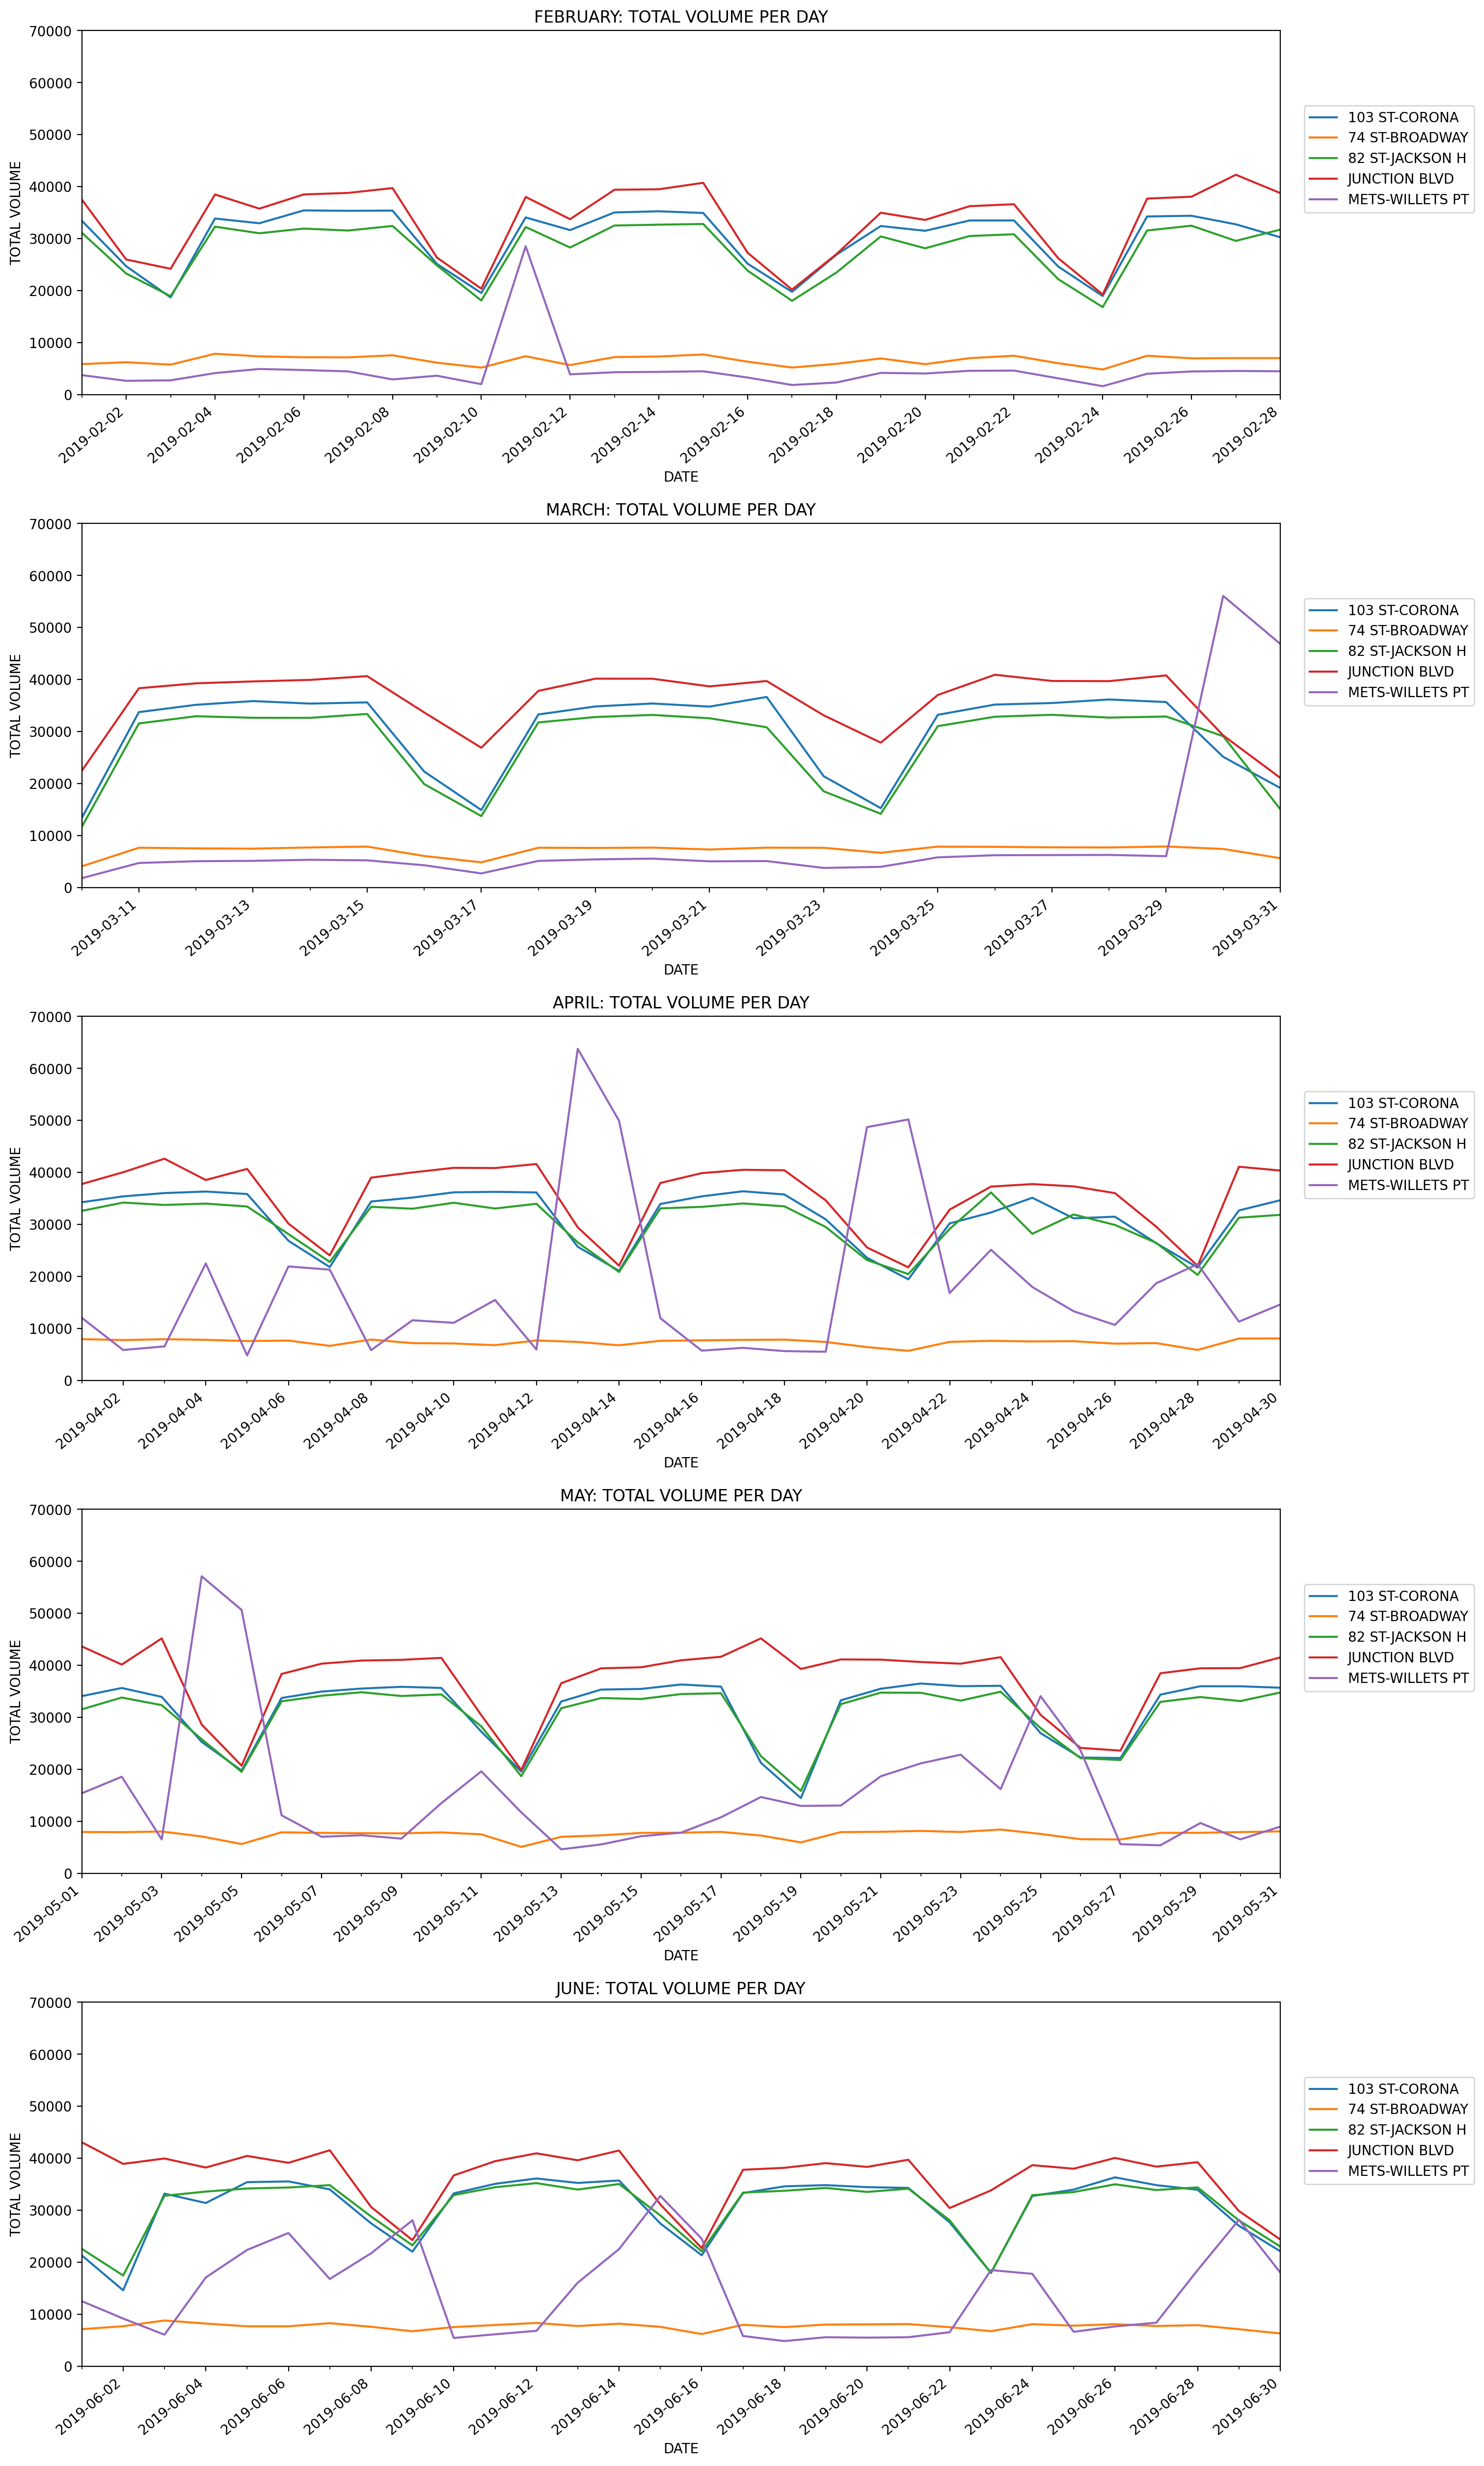

In [486]:
fig, axs = plt.subplots(5, 1, constrained_layout=True, figsize=(15, 25),dpi=200)
lims = [(np.datetime64('2019-02-01'), np.datetime64('2019-02-28')),
        (np.datetime64('2019-03-10'), np.datetime64('2019-03-31')),
        (np.datetime64('2019-04-01'), np.datetime64('2019-04-30')),
        (np.datetime64('2019-05-01'), np.datetime64('2019-05-31')),
        (np.datetime64('2019-06-01'), np.datetime64('2019-06-30'))]


axs[0].set_title('FEBRUARY: TOTAL VOLUME PER DAY')
axs[1].set_title('MARCH: TOTAL VOLUME PER DAY')
axs[2].set_title('APRIL: TOTAL VOLUME PER DAY')
axs[3].set_title('MAY: TOTAL VOLUME PER DAY')
axs[4].set_title('JUNE: TOTAL VOLUME PER DAY')

for idx, ax in enumerate(axs):
    sns.lineplot(ax=axs[idx], x='DATE', y='NET_BUSY',data=line7,hue='STATION')
    axs[idx].set_xlim(lims[idx])
    axs[idx].set_ylim(0,70000)
    
    axs[idx].xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    axs[idx].xaxis.set_major_locator(mdates.DayLocator(interval=2))
    axs[idx].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
    axs[idx].legend(loc=(1.02,0.5))
    
    axs[idx].set_ylabel('TOTAL VOLUME')
    axs[idx].set_xlabel('DATE')
   
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

In [403]:
junction_s = line7[line7['STATION'] == 'JUNCTION BLVD']
junction = junction.reset_index().copy()

st_corona_s = line7[line7['STATION'] == '103 ST-CORONA']
st_corona = st_corona_s.copy()

broadway_s = line7[line7['STATION'] == '74 ST-BROADWAY']
broadway = broadway_s.copy()

jackson_s = line7[line7['STATION'] == '82 ST-JACKSON H']
jackson = jackson_s.copy()

mets_willets_s = line7[line7['STATION'] == 'METS-WILLETS PT']
mets_willets = mets_willets_s.copy()

In [378]:
junction.dtypes

STATION                object
DATE           datetime64[ns]
LINENAME               object
NET_ENTRIES           float64
NET_EXITS             float64
NET_BUSY              float64
WEEKDAY                 int64
dtype: object

In [381]:
junction['WEEKDAY'] = junction['DATE'].dt.dayofweek
st_corona['WEEKDAY'] = st_corona['DATE'].dt.dayofweek
broadway['WEEKDAY'] = broadway['DATE'].dt.dayofweek
jackson['WEEKDAY'] = jackson['DATE'].dt.dayofweek
mets_willets['WEEKDAY'] = mets_willets['DATE'].dt.dayofweek
    
# change WEEKDAY from int64 to string Monday-Sunday
# daymap = {0:'Monday',
          #1: 'Tuesday',
          #2: 'Wednesday',
          #3: 'Thursday',
          #4: 'Friday',
          #5: 'Saturday',
          #6: 'Sunday'}
#mtadf_st_daily['WEEKDAY']=mtadf_st_daily['WEEKDAY'].map(daymap)

In [382]:
junction.dtypes

STATION                object
DATE           datetime64[ns]
LINENAME               object
NET_ENTRIES           float64
NET_EXITS             float64
NET_BUSY              float64
WEEKDAY                 int64
dtype: object

In [448]:
junction['WEEK_OF_YEAR'] = junction['DATE'].dt.isocalendar().week

In [483]:
junction[junction.DATE.dt.month == 6]

,index,STATION,DATE,LINENAME,NET_ENTRIES,NET_EXITS,NET_BUSY,WEEKDAY,WEEK_OF_YEAR
113,3127,JUNCTION BLVD,2019-06-01,7,17456.0,25601.0,43057.0,5,22
114,3128,JUNCTION BLVD,2019-06-02,7,14018.0,24886.0,38904.0,6,22
115,3129,JUNCTION BLVD,2019-06-03,7,21531.0,18404.0,39935.0,0,23
116,3130,JUNCTION BLVD,2019-06-04,7,20739.0,17461.0,38200.0,1,23
117,3131,JUNCTION BLVD,2019-06-05,7,22003.0,18427.0,40430.0,2,23
118,3132,JUNCTION BLVD,2019-06-06,7,21367.0,17739.0,39106.0,3,23
119,3133,JUNCTION BLVD,2019-06-07,7,22535.0,18983.0,41518.0,4,23
120,3134,JUNCTION BLVD,2019-06-08,7,16264.0,14345.0,30609.0,5,23
121,3135,JUNCTION BLVD,2019-06-09,7,12669.0,11568.0,24237.0,6,23
122,3136,JUNCTION BLVD,2019-06-10,7,20508.0,16177.0,36685.0,0,24


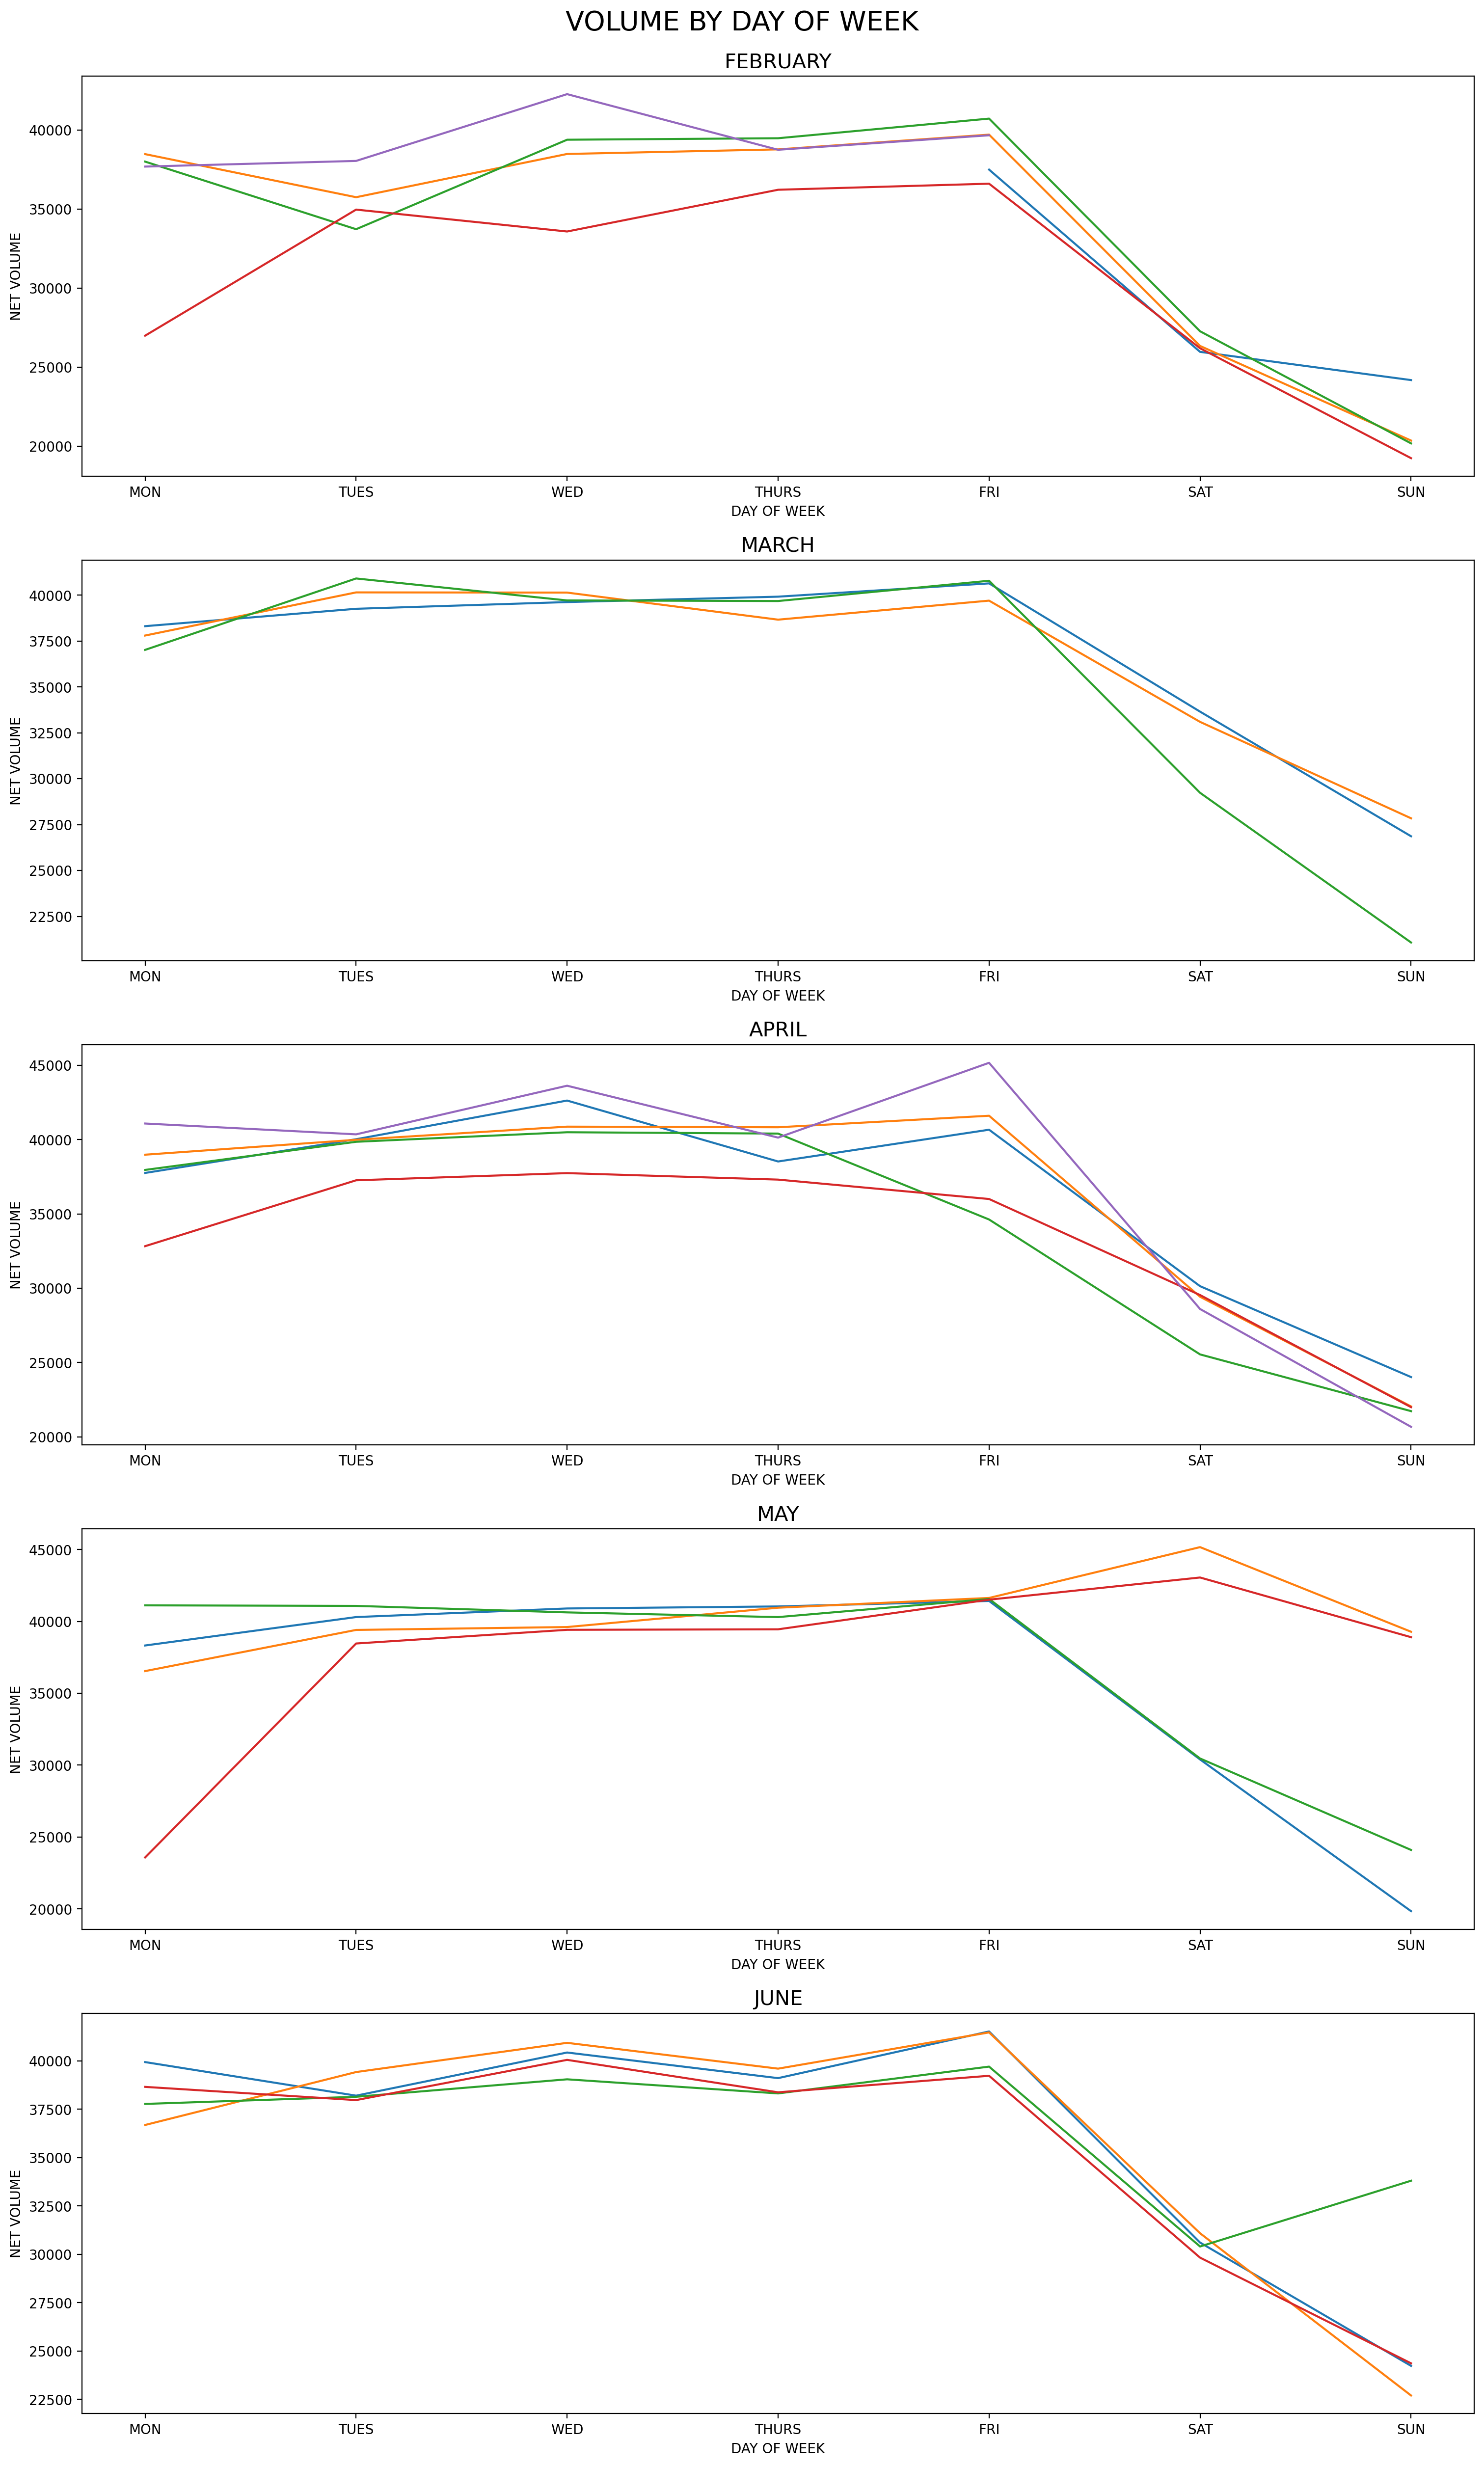

In [517]:
fig, axs = plt.subplots(5, 1, constrained_layout=True, figsize=(15, 25),dpi=200)

fig.suptitle('VOLUME BY DAY OF WEEK',ha='center',fontsize=20)

axs[0].set_title('FEBRUARY',ha='center',fontsize=15)
axs[1].set_title('MARCH',ha='center',fontsize=15)
axs[2].set_title('APRIL',ha='center',fontsize=15)
axs[3].set_title('MAY',ha='center',fontsize=15)
axs[4].set_title('JUNE',ha='center',fontsize=15)

weekday_map= {0:'MON', 1:'TUE', 2:'WED', 3:'THU',
              4:'FRI', 5:'SAT', 6:'SUN'}

for i in range(0,5):
    axs[i].set_xlabel('DAY OF WEEK')
    axs[i].set_ylabel('NET VOLUME')
    axs[i].set_xticks([0,1,2,3,4,5,6])
    axs[i].set_xticklabels(['MON','TUES','WED','THURS','FRI','SAT','SUN'])

for i, group in junction.groupby('WEEK_OF_YEAR'):
    if i in range(5,10):
        #feb week 5-9 inclusive
        sns.lineplot(ax=axs[0],x=group['WEEKDAY'],y=group['NET_BUSY'],data=junction)
    elif i in range(11,14):
        #march week 9-13 inclusive
        #week 9 is WEIRD
        sns.lineplot(ax=axs[1],x=group['WEEKDAY'],y=group['NET_BUSY'],data=junction)
    elif i in range(14,19):
        #april wee 14-18 inclusive
        sns.lineplot(ax=axs[2],x=group['WEEKDAY'],y=group['NET_BUSY'],data=junction)
    elif i in range(18,23):
        #may week 18-22 inclusive
        sns.lineplot(ax=axs[3],x=group['WEEKDAY'],y=group['NET_BUSY'],data=junction)
    elif i in range(22,27):
        #june week 22-26 inclusive
        sns.lineplot(ax=axs[4],x=group['WEEKDAY'],y=group['NET_BUSY'],data=junction)
    

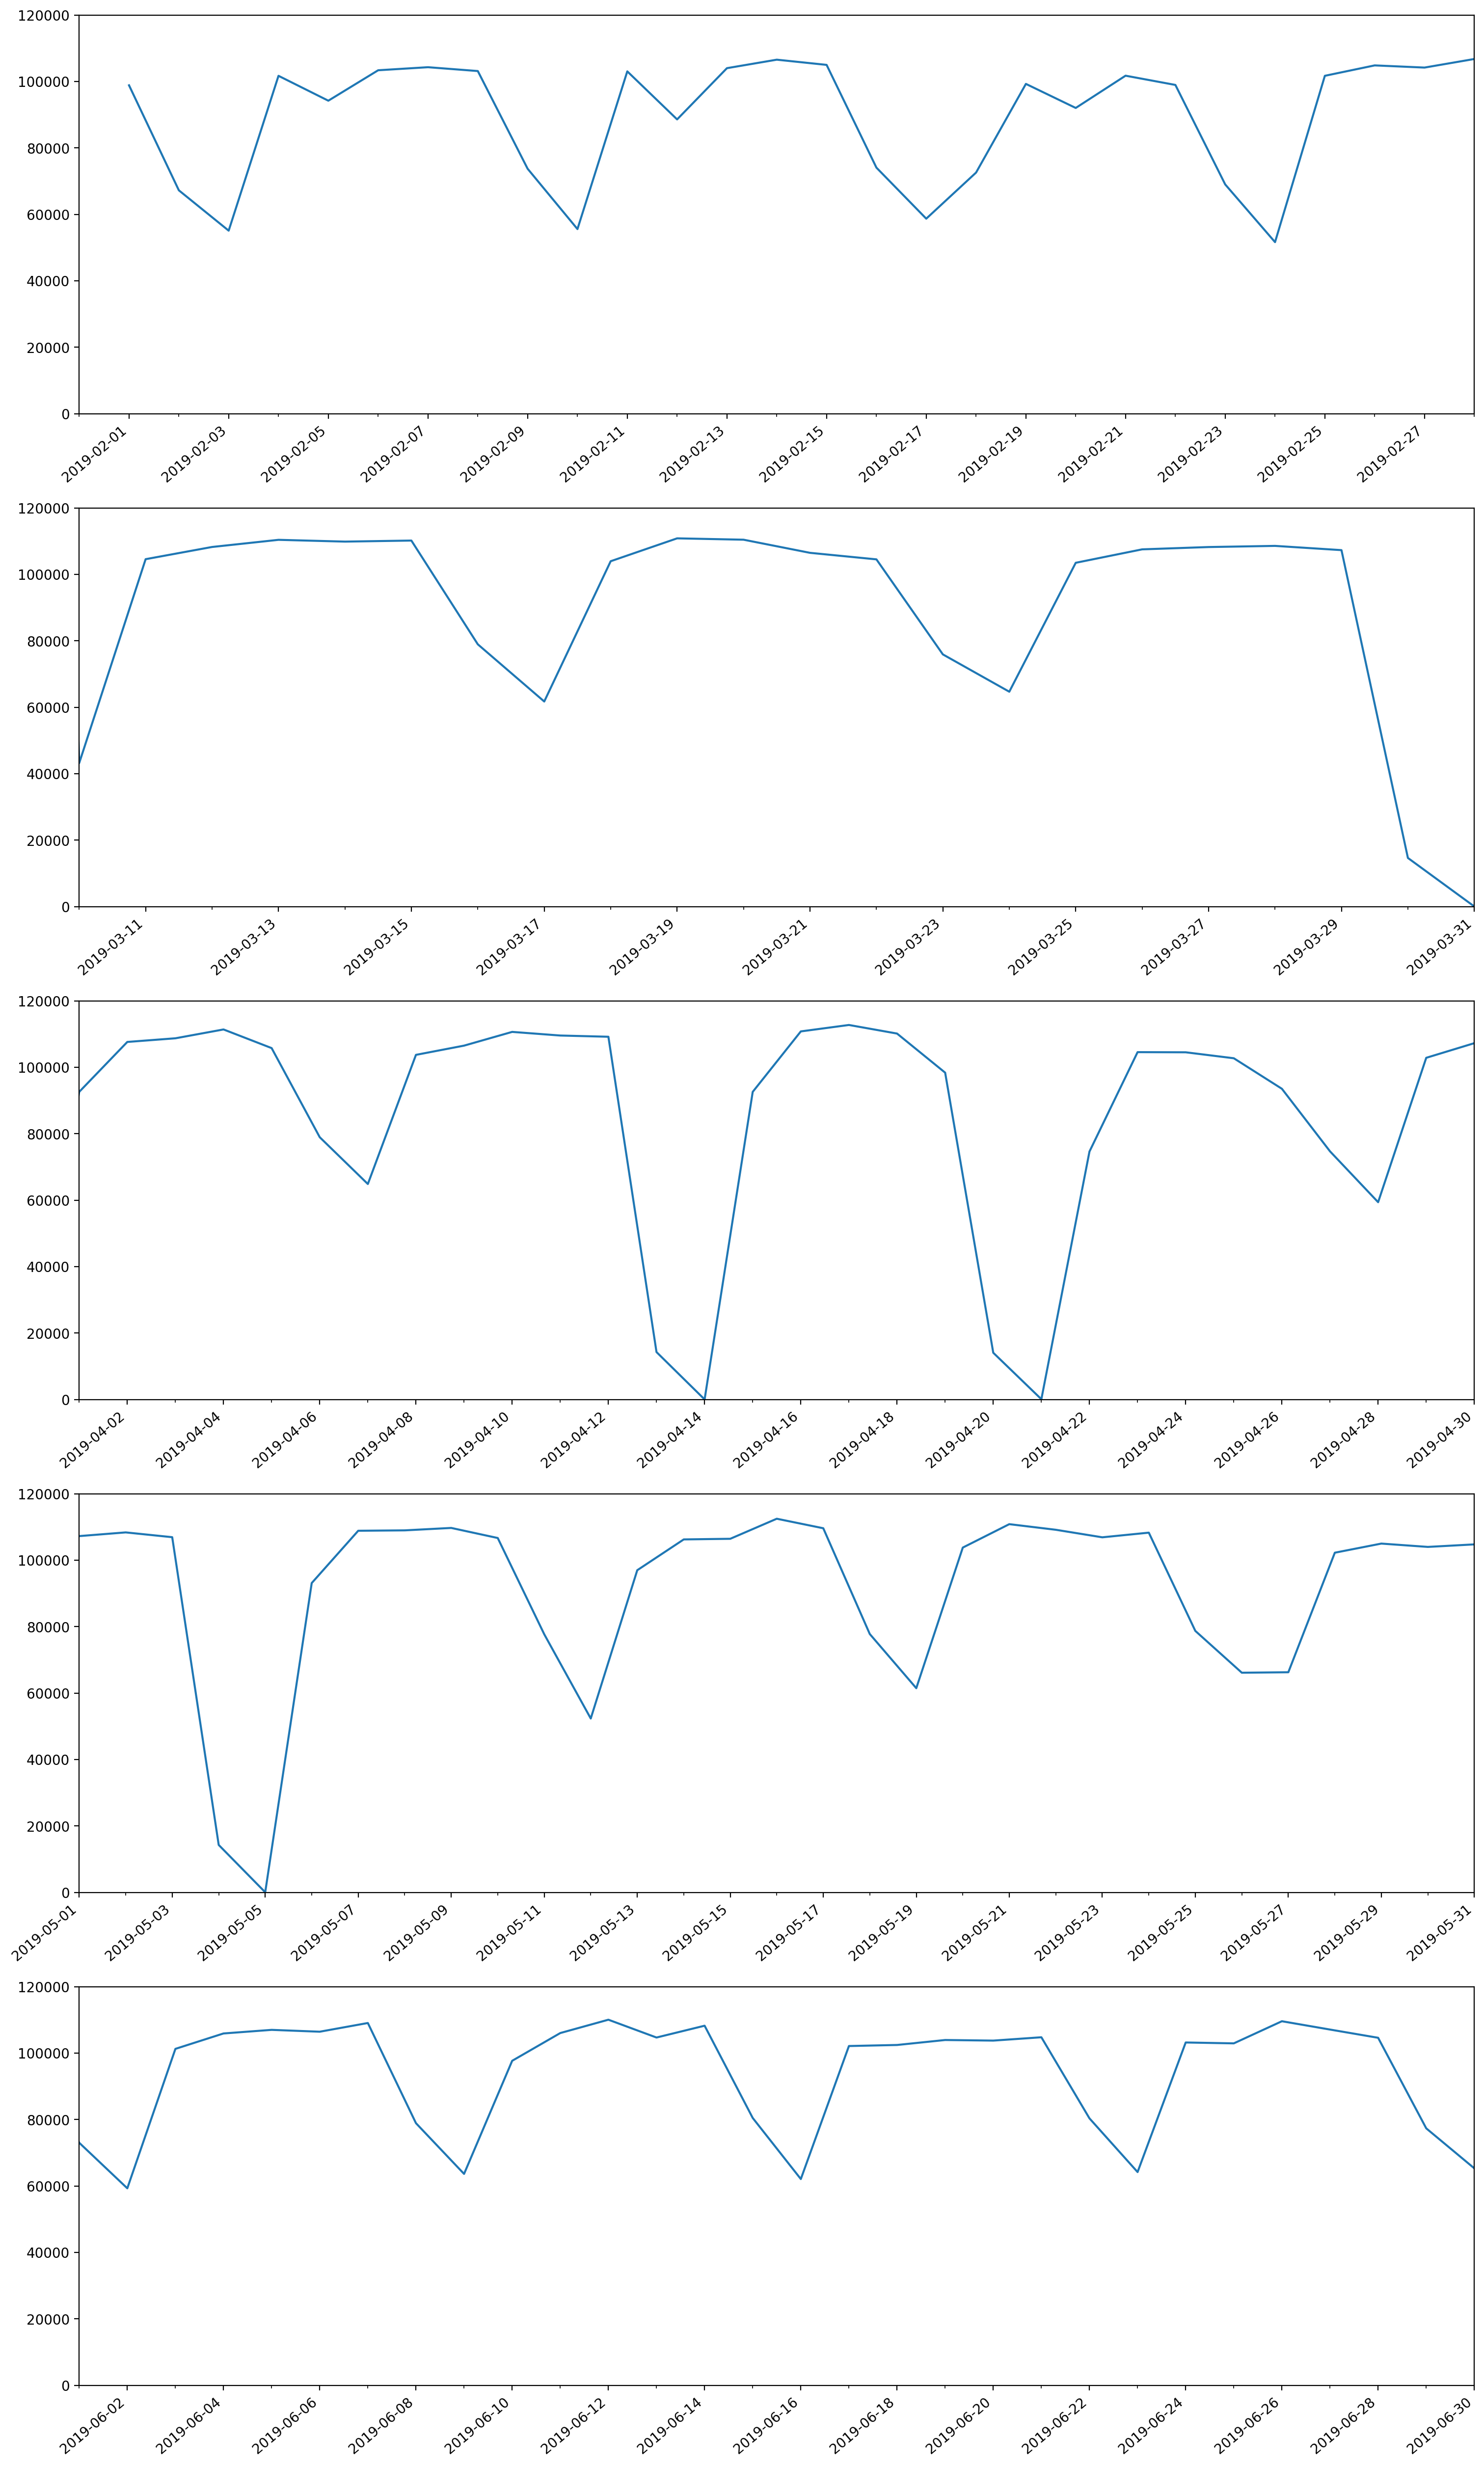

In [337]:
  
    start_day= group.index.min().to_pydatetime()
    #convert date to week age
    Xs = mdates.date2num(group.index.to_pydatetime()) \
        - mdates.date2num(start_day)
    Ys = group.A
    ax.plot(Xs, Ys)
ax.set_xticklabels(weekday_names)
ax.set_xticks(range(0, len(weekday_names)))

for idx, ax in enumerate(axs):
    sns.lineplot(ax=axs[idx], x='WEEKDAY', y='NET_BUSY',data=line7,hue='STATION')
    axs[idx].set_xlim(lims[idx])
    axs[idx].set_ylim(0,70000)
    
    axs[idx].xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    axs[idx].xaxis.set_major_locator(mdates.DayLocator(interval=2))
    axs[idx].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
    axs[idx].legend(loc=(1.02,0.5))
    
    axs[idx].set_ylabel('TOTAL VOLUME')
    axs[idx].set_xlabel('DATE')
   
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

/Users/lescardone/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(100.0, 300000.0)

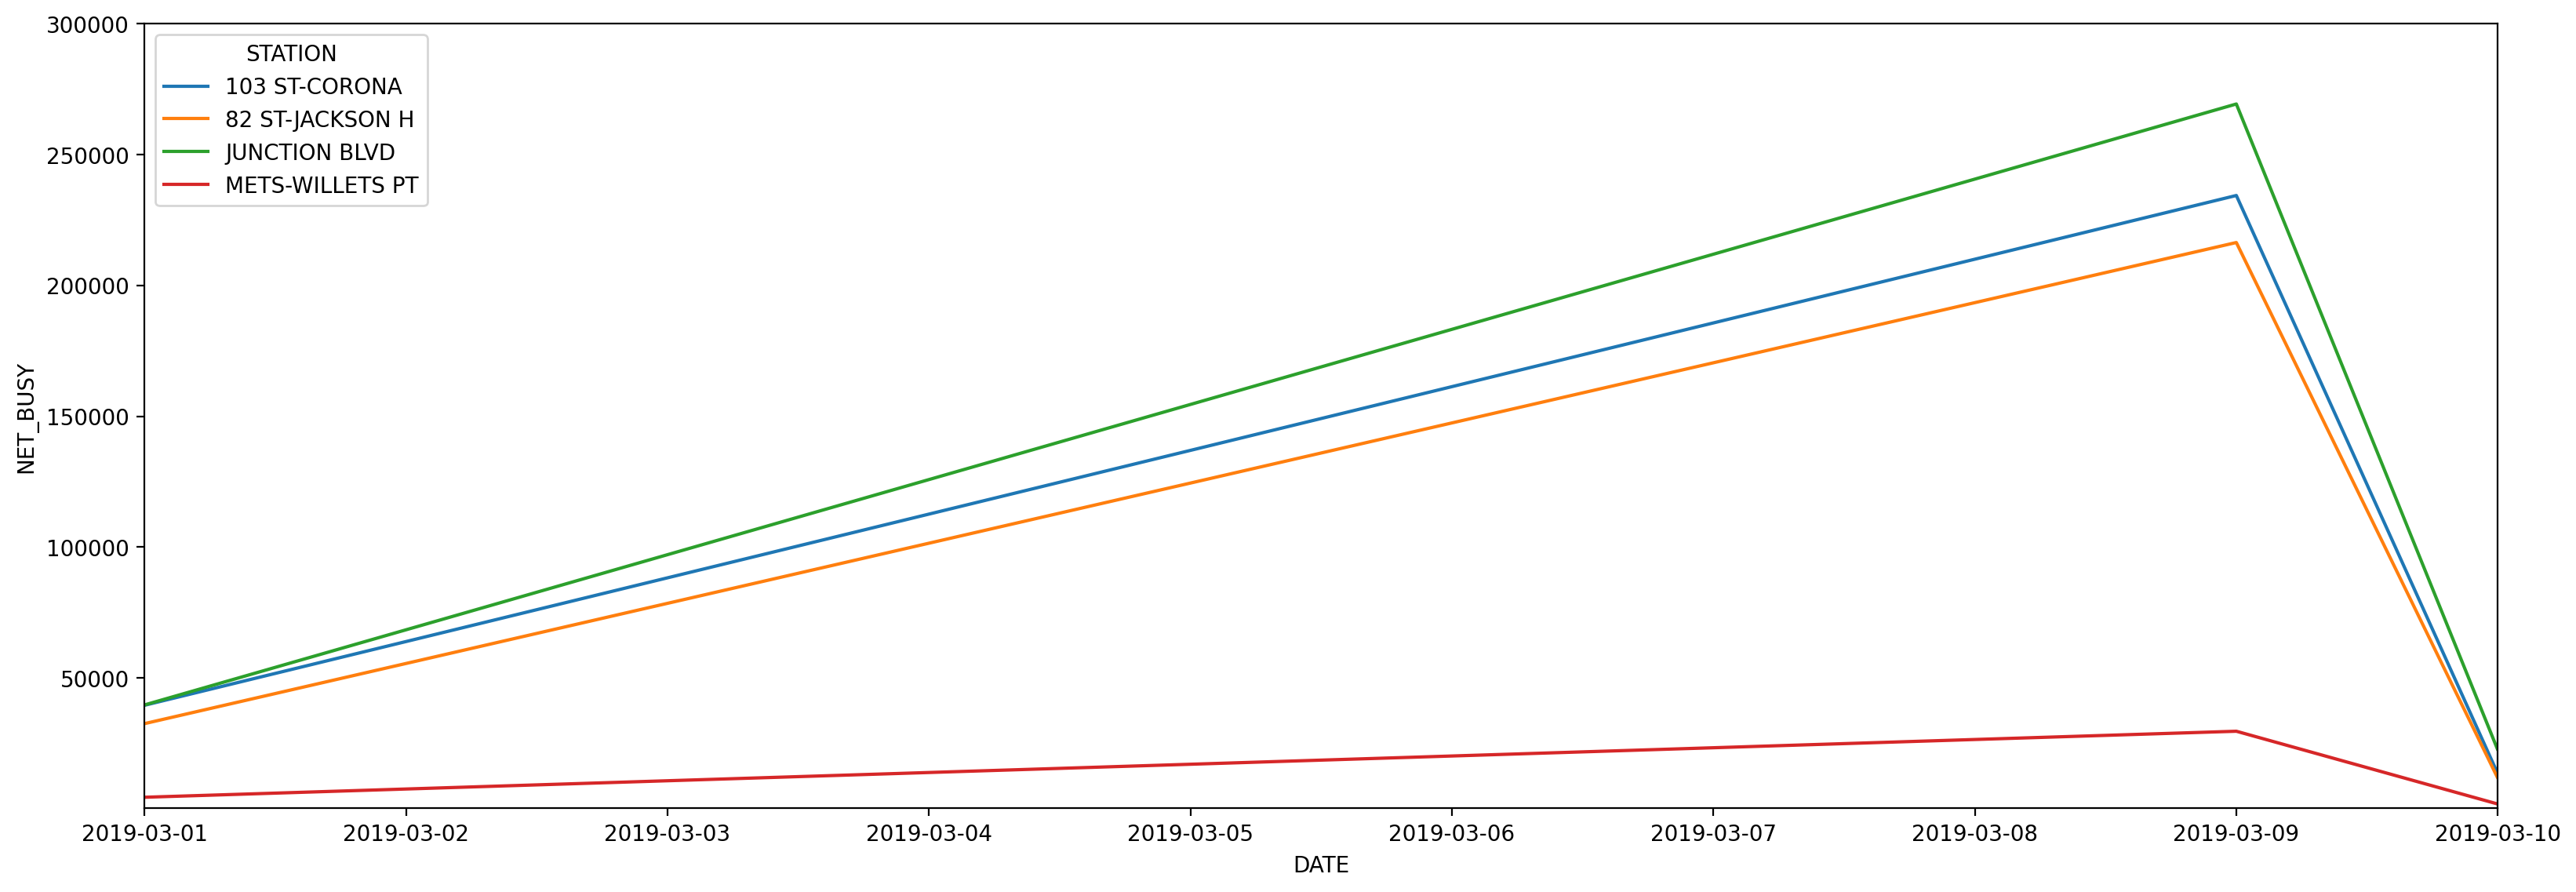

In [324]:
fig = plt.figure(figsize=(15,5),dpi=200)
axes = fig.add_axes([0,0,1,1])
sns.lineplot('DATE','NET_BUSY',data=line7, hue='STATION')
axes.set_xlim(np.datetime64('2019-03-01'), np.datetime64('2019-03-10'))
axes.set_ylim(100,300000)